In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

### Steps of how you approached this project
- Ran a ton of pairplots against win % (as the KPI) to see what correlates w/ it
- After determining no's, maybe's, and yes' created a new dataframe called df. Going to be using that for analysis from this point forward.
- May need to test against another KPI as well

In [2]:
cfb = pd.read_csv('C:/Users/Jing/Desktop/Galvanize_Capstones/JingWu-Final_Capstone/CFB.csv')

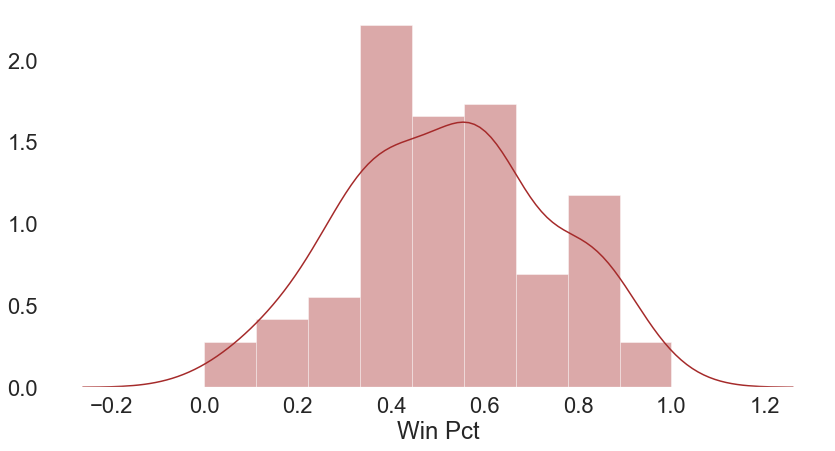

In [65]:
plt.figure(figsize = (14,7))
# sns.set(font_scale = 3)
sns.set(rc={'axes.facecolor':'white'},font_scale=2)
sns.distplot(cfb['Win Pct'],color='brown')

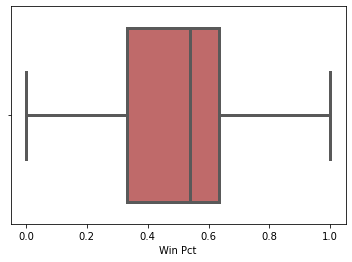

In [28]:
sns.boxplot(cfb['Win Pct'],linewidth=3,orient='h',color='indianred')

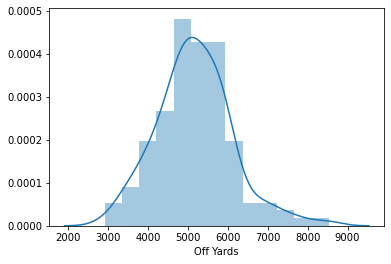

In [4]:
sns.distplot(cfb['Off Yards'])

In [5]:
pd.set_option('display.max_columns', 999)

In [6]:
cfb.head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force,Mountain West,11,2,13,0.846154,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,129,7,93,0,13.29,125,126,68,6,1602,12.71,23.56,14,123.2,51,238,377,2848,21,7.55,11.97,219.1,2,42,368,28.31,129,5,6,0,1.2,27,7,38,0,5.43,9,43,10,13,8,31,0.721,33,54,39,0,9,48,0.889,7,375,1307,3.49,11,100.5,2,755,3881,5.14,41,298.5,72,26,168,2.0,20,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15


In [7]:
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 149 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Conference                             object 
 2   Win                                    int64  
 3   Loss                                   int64  
 4   Games                                  int64  
 5   Win Pct                                float64
 6   Off Rank                               int64  
 7   Off Plays                              int64  
 8   Off Yards                              int64  
 9   Off Yards/Play                         float64
 10  Off TDs                                int64  
 11  Off Yards per Game                     float64
 12  Def Rank                               int64  
 13  Def Plays                              int64  
 14  Yards Allowed                          int64  
 15  Yards

In [8]:
# pd.set_option('max_height', 1000)
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
# pd.set_option('width', 1000)
cor = cfb.corr()

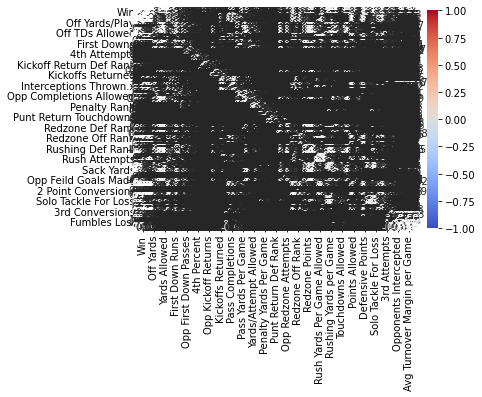

In [33]:
sns.heatmap(cfb.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [9]:
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 149 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Conference                             object 
 2   Win                                    int64  
 3   Loss                                   int64  
 4   Games                                  int64  
 5   Win Pct                                float64
 6   Off Rank                               int64  
 7   Off Plays                              int64  
 8   Off Yards                              int64  
 9   Off Yards/Play                         float64
 10  Off TDs                                int64  
 11  Off Yards per Game                     float64
 12  Def Rank                               int64  
 13  Def Plays                              int64  
 14  Yards Allowed                          int64  
 15  Yards

In [3]:
df = cfb.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,23,39,53,55,59,62,80,81,84,87,88,91,92,93,95,96,97,98,101,103,105,106,107,108,109,110,111,116,117,118,
                119,120,125,126,128,130,131,133,135,136,140,142,143,147,148]].copy()

In [45]:
plt.figure(figsize = (50,25))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

TypeError: corr() missing 1 required positional argument: 'other'

<Figure size 3600x1800 with 0 Axes>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team                          130 non-null    object 
 1   Conference                    130 non-null    object 
 2   Win                           130 non-null    int64  
 3   Loss                          130 non-null    int64  
 4   Games                         130 non-null    int64  
 5   Win Pct                       130 non-null    float64
 6   Off Rank                      130 non-null    int64  
 7   Off Plays                     130 non-null    int64  
 8   Off Yards                     130 non-null    int64  
 9   Off Yards/Play                130 non-null    float64
 10  Off TDs                       130 non-null    int64  
 11  Off Yards per Game            130 non-null    float64
 12  Def Rank                      130 non-null    int64  
 13  Yards

In [4]:
df1 = df.iloc[:,[5,7,10,11,14,16,18,20,21,22,23,24,25,26,27,28,29,31,33,35,36,37,38,40,42,44,45,47,49,50,52,54,55,57,60,61,63]].copy()

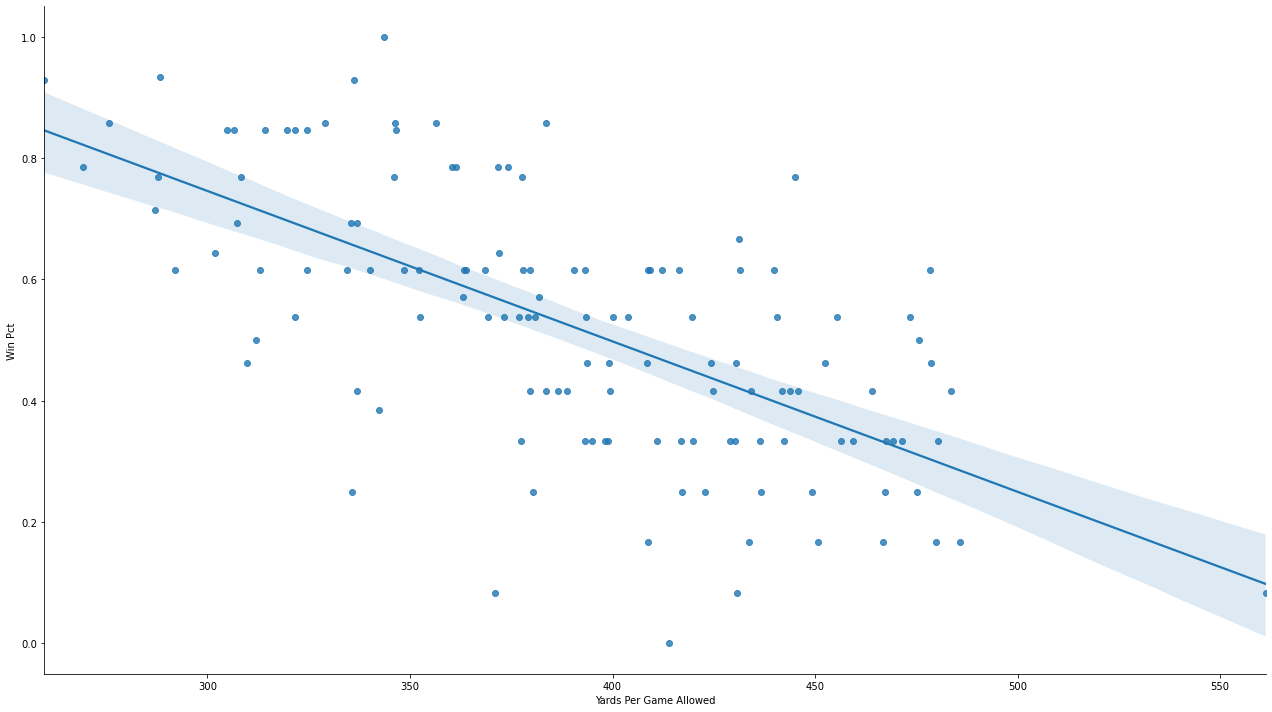

In [13]:
sns.lmplot(x='Yards Per Game Allowed',y='Win Pct',height=10,aspect=16/9,data=cfb)

In [ ]:
sns.scatterplot()

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Win Pct                       130 non-null    float64
 1   Off Plays                     130 non-null    int64  
 2   Off TDs                       130 non-null    int64  
 3   Off Yards per Game            130 non-null    float64
 4   Off TDs Allowed               130 non-null    int64  
 5   Yards Per Game Allowed        130 non-null    float64
 6   First Down Runs               130 non-null    int64  
 7   Kickoff Touchbacks            130 non-null    int64  
 8   Pass Yards/Attempt            130 non-null    float64
 9   Pass Touchdowns               130 non-null    int64  
 10  Opp Pass Attempts             130 non-null    int64  
 11  Yards/Attempt Allowed         130 non-null    float64
 12  Opp Redzone Attempts          130 non-null    int64  
 13  Opp R

In [14]:
df1.rename(columns={"Opp Rush Yards Alloweed": "Opp Rush Yards Allowed", "3rd Conversions": "Third Conversions"},inplace=True)

In [15]:
df1.columns = [item.replace(' ','_') for item in df1.columns]
df1.columns = [item.replace('/','_') for item in df1.columns]

In [16]:
df1.columns[33]

'Third_Conversions'

In [17]:
df1.head(1)

,Win_Pct,Off_Plays,Off_TDs,Off_Yards_per_Game,Off_TDs_Allowed,Yards_Per_Game_Allowed,First_Down_Runs,Kickoff_Touchbacks,Pass_Yards_Attempt,Pass_Touchdowns,Opp_Pass_Attempts,Yards_Attempt_Allowed,Opp_Redzone_Attempts,Opp_Redzone_Rush_TD_Allowed,Opp_Redzone_Scores,Redzone_Attempts,Redzone_Rush_TD,Redzone_Points,Opp_Rush_Yards_Allowed,Opp_Rush_Touchdowns_Allowed,Rush_Yards_Per_Game_Allowed,Rush_Yds,Rushing_TD,Sacks,Average_Sacks_per_Game,Touchdowns_Allowed,Opponent_Extra_Points,Avg_Points_per_Game_Allowed,Touchdowns,PAT,Points_Per_Game,Tackle_for_Loss_Yards,Total_Tackle_For_Loss,Third_Conversions,Opponents_Intercepted,Turnovers_Gain,Avg_Turnover_Margin_per_Game
0,0.846154,881,55,421.8,32,319.6,227,26,12.71,14,377,7.55,43,10,31,54,39,0.889,1307,11,100.5,3881,41,26,2.0,34,27,19.8,58,52,34.1,247,54,84,7,16,-0.15


### Running Linear Regressions. Supposed to have around 60 linear tests

In [18]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [19]:
formula = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Kickoff_Touchbacks + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Rush_TD_Allowed + Opp_Redzone_Scores + Redzone_Attempts + Redzone_Rush_TD + Redzone_Points + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + PAT + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [20]:
train, test = statsmodels_train_test_split(df1)

In [21]:
model = smf.ols(formula = formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     28.27
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.58e-26
Time:                        16:02:13   Log-Likelihood:                 149.92
No. Observations:                  97   AIC:                            -227.8
Df Residuals:                      61   BIC:                            -135.2
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.2018      0.581     -2.068      0.043      -2.364      -0.040
Off_Plays                        0.0005      0.000      1.388      0.170      -0.000       0.001
Off_TDs                         -0.0038      0.004     -0.978      0.332      -0.011       0.004
Off_Yards_per_Game              -0.0006      0.001     -1.090      0.280      -0.002       0.001
Off_TDs_Allowed                 -0.0139      0.007     -1.889      0.064      -0.029       0.001
Yards_Per_Game_Allowed          -0.0059      0.002     -2.571      0.013      -0.010      -0.001
First_Down_Runs                 -0.0005      0.001     -0.468      0.642      -0.003       0.002
Kickoff_Touchbacks               0.0003      0.001      0.507      0.614      -0.001       0.002
Pass_Yards_Attempt               0.0140      0.016      0.882      0.381      -0.018       0.046
Pass_Touchdowns                  0.0007      0.003      0.276      0.783      -0.004       0.006
Opp_Pass_Attempts                0.0037      0.001      2.929      0.005       0.001       0.006
Yards_Attempt_Allowed            0.1830      0.074      2.486      0.016       0.036       0.330
Opp_Redzone_Attempts             0.0018      0.003      0.576      0.567      -0.004       0.008
Opp_Redzone_Rush_TD_Allowed     -0.0067      0.006     -1.175      0.245      -0.018       0.005
Opp_Redzone_Scores               0.0018      0.004      0.463      0.645      -0.006       0.010
Redzone_Attempts                -0.0034      0.002     -1.693      0.095      -0.007       0.001
Redzone_Rush_TD                  0.0015      0.005      0.291      0.772      -0.009       0.012
Redzone_Points                  -0.0878      0.162     -0.542      0.590      -0.412       0.236
Opp_Rush_Yards_Allowed           0.0002      0.000      0.544      0.588      -0.000       0.001
Opp_Rush_Touchdowns_Allowed      0.0091      0.005      1.803      0.076      -0.001       0.019
Rush_Yards_Per_Game_Allowed      0.0031      0.005      0.624      0.535      -0.007       0.013
Rush_Yds                      3.901e-05   5.65e-05      0.690      0.493   -7.41e-05       0.000
Rushing_TD                      -0.0045      0.004     -1.216      0.229      -0.012       0.003
Sacks                           -0.0282      0.015     -1.865      0.067      -0.059       0.002
Average_Sacks_per_Game           0.3397      0.193      1.757      0.084      -0.047       0.726
Touchdowns_Allowed               0.0071      0.010      0.741      0.462      -0.012       0.026
Opponent_Extra_Points            0.0107      0.004      2.839      0.006       0.003       0.018
Avg_Points_per_Game_Allowed     -0.0229      0.014     -1.622      0.110      -0.051       0.005
Touchdowns                       0.0026      0.008      0.319      0.750    

In [22]:
formula1 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Kickoff_Touchbacks + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Rush_TD_Allowed + Opp_Redzone_Scores + Redzone_Attempts + Redzone_Rush_TD + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [23]:
train1, test1 = statsmodels_train_test_split(df1)

In [24]:
model1 = smf.ols(formula = formula1, data=train1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     32.95
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           8.44e-29
Time:                        16:02:14   Log-Likelihood:                 150.37
No. Observations:                  97   AIC:                            -232.7
Df Residuals:                      63   BIC:                            -145.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8327      0.464     -1.794      0.078      -1.760       0.095
Off_Plays                        0.0007      0.000      1.830      0.072   -6.09e-05       0.001
Off_TDs                       9.291e-06      0.003      0.003      0.998      -0.007       0.007
Off_Yards_per_Game              -0.0010      0.001     -1.776      0.081      -0.002       0.000
Off_TDs_Allowed                  0.0005      0.007      0.069      0.945      -0.014       0.014
Yards_Per_Game_Allowed          -0.0027      0.002     -1.365      0.177      -0.007       0.001
First_Down_Runs                 -0.0011      0.001     -0.939      0.352      -0.003       0.001
Kickoff_Touchbacks              -0.0005      0.001     -0.985      0.328      -0.002       0.001
Pass_Yards_Attempt               0.0298      0.014      2.166      0.034       0.002       0.057
Pass_Touchdowns                  0.0004      0.002      0.179      0.859      -0.004       0.005
Opp_Pass_Attempts                0.0018      0.001      1.676      0.099      -0.000       0.004
Yards_Attempt_Allowed            0.0870      0.061      1.427      0.158      -0.035       0.209
Opp_Redzone_Attempts             0.0027      0.003      0.861      0.393      -0.004       0.009
Opp_Redzone_Rush_TD_Allowed      0.0042      0.005      0.797      0.428      -0.006       0.015
Opp_Redzone_Scores              -0.0048      0.004     -1.207      0.232      -0.013       0.003
Redzone_Attempts                -0.0008      0.002     -0.472      0.639      -0.004       0.003
Redzone_Rush_TD                 -0.0022      0.004     -0.507      0.614      -0.011       0.006
Opp_Rush_Yards_Allowed           0.0001      0.000      0.521      0.604      -0.000       0.001
Opp_Rush_Touchdowns_Allowed     -0.0030      0.005     -0.654      0.515      -0.012       0.006
Rush_Yards_Per_Game_Allowed      0.0021      0.004      0.555      0.581      -0.005       0.010
Rush_Yds                      7.798e-05    5.7e-05      1.368      0.176   -3.59e-05       0.000
Rushing_TD                      -0.0004      0.003     -0.131      0.896      -0.007       0.006
Sacks                           -0.0057      0.013     -0.426      0.672      -0.033       0.021
Average_Sacks_per_Game           0.1076      0.172      0.627      0.533      -0.235       0.450
Touchdowns_Allowed              -0.0037      0.010     -0.360      0.720      -0.024       0.017
Opponent_Extra_Points            0.0080      0.003      2.335      0.023       0.001       0.015
Avg_Points_per_Game_Allowed     -0.0209      0.014     -1.515      0.135      -0.048       0.007
Touchdowns                      -0.0049      0.006     -0.779      0.439      -0.017       0.008
Points_Per_Game                  0.0242      0.008      3.033      0.004    

In [25]:
formula2 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Kickoff_Touchbacks + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Redzone_Rush_TD + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [26]:
train2, test2 = statsmodels_train_test_split(df1)

In [27]:
model2 = smf.ols(formula = formula2, data=train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     30.42
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           5.75e-28
Time:                        16:02:15   Log-Likelihood:                 145.47
No. Observations:                  97   AIC:                            -224.9
Df Residuals:                      64   BIC:                            -140.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.4131      0.534     -0.774      0.442      -1.479       0.653
Off_Plays                        0.0007      0.000      1.783      0.079   -8.03e-05       0.001
Off_TDs                         -0.0010      0.004     -0.279      0.781      -0.009       0.006
Off_Yards_per_Game              -0.0010      0.001     -1.838      0.071      -0.002    8.49e-05
Off_TDs_Allowed                 -0.0127      0.007     -1.859      0.068      -0.026       0.001
Yards_Per_Game_Allowed          -0.0004      0.002     -0.182      0.856      -0.005       0.004
First_Down_Runs                 -0.0018      0.001     -1.480      0.144      -0.004       0.001
Kickoff_Touchbacks              -0.0004      0.001     -0.650      0.518      -0.002       0.001
Pass_Yards_Attempt               0.0316      0.013      2.411      0.019       0.005       0.058
Pass_Touchdowns                  0.0027      0.003      1.071      0.288      -0.002       0.008
Opp_Pass_Attempts                0.0007      0.001      0.536      0.594      -0.002       0.003
Yards_Attempt_Allowed            0.0335      0.075      0.446      0.657      -0.116       0.183
Opp_Redzone_Attempts          3.191e-05      0.003      0.010      0.992      -0.006       0.006
Opp_Redzone_Scores               0.0007      0.004      0.193      0.847      -0.006       0.008
Redzone_Attempts                -0.0011      0.002     -0.585      0.561      -0.005       0.003
Redzone_Rush_TD                  0.0017      0.005      0.346      0.730      -0.008       0.012
Opp_Rush_Yards_Allowed          -0.0001      0.000     -0.511      0.611      -0.001       0.000
Opp_Rush_Touchdowns_Allowed      0.0015      0.002      0.612      0.543      -0.003       0.007
Rush_Yards_Per_Game_Allowed      0.0031      0.004      0.727      0.470      -0.005       0.012
Rush_Yds                         0.0001   6.35e-05      1.974      0.053   -1.51e-06       0.000
Rushing_TD                      -0.0037      0.003     -1.093      0.278      -0.011       0.003
Sacks                            0.0095      0.016      0.608      0.545      -0.022       0.041
Average_Sacks_per_Game          -0.0967      0.197     -0.491      0.625      -0.491       0.297
Touchdowns_Allowed               0.0085      0.010      0.850      0.398      -0.012       0.029
Opponent_Extra_Points            0.0127      0.004      3.037      0.003       0.004       0.021
Avg_Points_per_Game_Allowed     -0.0378      0.014     -2.714      0.009      -0.066      -0.010
Touchdowns                      -0.0008      0.007     -0.121      0.904      -0.014       0.012
Points_Per_Game                  0.0143      0.008      1.848      0.069      -0.001       0.030
Tackle_for_Loss_Yards            0.0002      0.000      0.558      0.579    

In [28]:
formula3 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Off_TDs_Allowed + Yards_Per_Game_Allowed + First_Down_Runs + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Opponents_Intercepted + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [29]:
train3, test3 = statsmodels_train_test_split(df1)

In [30]:
model3 = smf.ols(formula = formula3, data=train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     37.76
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           4.44e-31
Time:                        16:02:15   Log-Likelihood:                 147.00
No. Observations:                  97   AIC:                            -232.0
Df Residuals:                      66   BIC:                            -152.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8608      0.427     -2.016      0.048      -1.713      -0.008
Off_Plays                        0.0006      0.000      2.016      0.048    6.34e-06       0.001
Off_TDs                         -0.0027      0.003     -0.802      0.426      -0.009       0.004
Off_Yards_per_Game              -0.0011      0.001     -1.981      0.052      -0.002    8.38e-06
Off_TDs_Allowed                 -0.0069      0.006     -1.074      0.287      -0.020       0.006
Yards_Per_Game_Allowed          -0.0022      0.002     -1.180      0.242      -0.006       0.002
First_Down_Runs                 -0.0006      0.001     -0.511      0.611      -0.003       0.002
Pass_Yards_Attempt               0.0338      0.013      2.676      0.009       0.009       0.059
Pass_Touchdowns                 -0.0006      0.002     -0.338      0.737      -0.004       0.003
Opp_Pass_Attempts                0.0019      0.001      1.880      0.065      -0.000       0.004
Yards_Attempt_Allowed            0.0862      0.057      1.515      0.134      -0.027       0.200
Opp_Redzone_Attempts             0.0003      0.003      0.080      0.937      -0.006       0.007
Opp_Redzone_Scores              -0.0010      0.004     -0.248      0.805      -0.009       0.007
Redzone_Attempts                -0.0009      0.002     -0.553      0.582      -0.004       0.002
Opp_Rush_Yards_Allowed       -7.751e-05      0.000     -0.338      0.737      -0.001       0.000
Opp_Rush_Touchdowns_Allowed      0.0018      0.003      0.670      0.505      -0.003       0.007
Rush_Yards_Per_Game_Allowed      0.0046      0.004      1.198      0.235      -0.003       0.012
Rush_Yds                      5.346e-05   5.63e-05      0.949      0.346    -5.9e-05       0.000
Rushing_TD                      -0.0020      0.002     -0.944      0.349      -0.006       0.002
Sacks                           -0.0094      0.012     -0.755      0.453      -0.034       0.015
Average_Sacks_per_Game           0.1429      0.155      0.921      0.360      -0.167       0.453
Touchdowns_Allowed               0.0059      0.010      0.598      0.552      -0.014       0.026
Opponent_Extra_Points            0.0093      0.004      2.312      0.024       0.001       0.017
Avg_Points_per_Game_Allowed     -0.0354      0.014     -2.533      0.014      -0.063      -0.007
Touchdowns                       0.0016      0.006      0.261      0.795      -0.011       0.014
Points_Per_Game                  0.0175      0.008      2.318      0.024       0.002       0.033
Tackle_for_Loss_Yards            0.0001      0.000      0.330      0.742      -0.001       0.001
Total_Tackle_For_Loss           -0.0006      0.001     -0.565      0.574      -0.003       0.002
Third_Conversions                0.0014      0.001      1.482      0.143    

In [31]:
formula4 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + First_Down_Runs + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Opp_Rush_Touchdowns_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [32]:
train4, test4 = statsmodels_train_test_split(df1)

In [33]:
model4 = smf.ols(formula = formula4, data=train4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     36.98
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           4.49e-31
Time:                        16:02:16   Log-Likelihood:                 146.20
No. Observations:                  97   AIC:                            -234.4
Df Residuals:                      68   BIC:                            -159.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.7910      0.456     -1.734      0.087      -1.701       0.119
Off_Plays                        0.0005      0.000      1.302      0.197      -0.000       0.001
Off_TDs                          0.0005      0.004      0.135      0.893      -0.007       0.008
Off_Yards_per_Game              -0.0007      0.001     -1.362      0.178      -0.002       0.000
Yards_Per_Game_Allowed          -0.0029      0.002     -1.595      0.115      -0.007       0.001
First_Down_Runs                 -0.0005      0.001     -0.464      0.644      -0.003       0.002
Pass_Yards_Attempt               0.0351      0.013      2.798      0.007       0.010       0.060
Pass_Touchdowns                  0.0012      0.002      0.572      0.569      -0.003       0.005
Opp_Pass_Attempts                0.0019      0.001      1.847      0.069      -0.000       0.004
Yards_Attempt_Allowed            0.0948      0.060      1.584      0.118      -0.025       0.214
Opp_Redzone_Attempts             0.0033      0.003      0.993      0.324      -0.003       0.010
Opp_Redzone_Scores              -0.0041      0.004     -1.061      0.292      -0.012       0.004
Redzone_Attempts                -0.0019      0.002     -1.233      0.222      -0.005       0.001
Opp_Rush_Yards_Allowed       -3.855e-05      0.000     -0.172      0.864      -0.000       0.000
Opp_Rush_Touchdowns_Allowed      0.0016      0.002      0.629      0.532      -0.003       0.007
Rush_Yards_Per_Game_Allowed      0.0038      0.004      1.005      0.318      -0.004       0.011
Rush_Yds                      1.608e-05   5.62e-05      0.286      0.776    -9.6e-05       0.000
Rushing_TD                      -0.0007      0.002     -0.332      0.741      -0.005       0.004
Sacks                           -0.0030      0.013     -0.229      0.820      -0.030       0.023
Average_Sacks_per_Game           0.0382      0.167      0.229      0.819      -0.295       0.371
Touchdowns_Allowed               0.0005      0.008      0.060      0.952      -0.015       0.016
Opponent_Extra_Points            0.0026      0.004      0.703      0.484      -0.005       0.010
Avg_Points_per_Game_Allowed     -0.0200      0.013     -1.557      0.124      -0.046       0.006
Touchdowns                      -0.0019      0.006     -0.309      0.758      -0.015       0.011
Points_Per_Game                  0.0146      0.007      2.029      0.046       0.000       0.029
Tackle_for_Loss_Yards            0.0007      0.000      2.405      0.019       0.000       0.001
Total_Tackle_For_Loss           -0.0019      0.001     -1.749      0.085      -0.004       0.000
Third_Conversions                0.0025      0.001      2.380      0.020       0.000       0.005
Turnovers_Gain                  -0.0021      0.003     -0.611      0.543    

In [34]:
formula5 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Rush_Yards_Per_Game_Allowed + Rush_Yds + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [35]:
train5, test5 = statsmodels_train_test_split(df1)

In [36]:
model5 = smf.ols(formula = formula5, data=train5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     36.99
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           2.93e-31
Time:                        16:02:17   Log-Likelihood:                 142.94
No. Observations:                  97   AIC:                            -231.9
Df Residuals:                      70   BIC:                            -162.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.3241      0.558     -2.372      0.020      -2.437      -0.211
Off_Plays                        0.0002      0.000      0.787      0.434      -0.000       0.001
Off_TDs                         -0.0010      0.003     -0.290      0.772      -0.008       0.006
Off_Yards_per_Game              -0.0007      0.000     -1.527      0.131      -0.002       0.000
Yards_Per_Game_Allowed          -0.0057      0.002     -2.521      0.014      -0.010      -0.001
Pass_Yards_Attempt               0.0297      0.010      3.082      0.003       0.010       0.049
Pass_Touchdowns                  0.0020      0.002      0.993      0.324      -0.002       0.006
Opp_Pass_Attempts                0.0036      0.001      2.793      0.007       0.001       0.006
Yards_Attempt_Allowed            0.1784      0.074      2.425      0.018       0.032       0.325
Opp_Redzone_Attempts         -1.382e-05      0.003     -0.005      0.996      -0.006       0.006
Opp_Redzone_Scores           -4.015e-05      0.003     -0.012      0.991      -0.007       0.007
Redzone_Attempts                -0.0015      0.002     -0.961      0.340      -0.005       0.002
Opp_Rush_Yards_Allowed       -2.624e-05      0.000     -0.105      0.916      -0.001       0.000
Rush_Yards_Per_Game_Allowed      0.0068      0.005      1.448      0.152      -0.003       0.016
Rush_Yds                       6.21e-05   2.47e-05      2.517      0.014    1.29e-05       0.000
Rushing_TD                      -0.0030      0.002     -1.409      0.163      -0.007       0.001
Sacks                           -0.0121      0.012     -1.015      0.313      -0.036       0.012
Average_Sacks_per_Game           0.1555      0.151      1.032      0.305      -0.145       0.456
Touchdowns_Allowed               0.0014      0.007      0.187      0.852      -0.013       0.016
Opponent_Extra_Points            0.0031      0.004      0.762      0.449      -0.005       0.011
Avg_Points_per_Game_Allowed     -0.0218      0.013     -1.647      0.104      -0.048       0.005
Touchdowns                      -0.0067      0.007     -1.015      0.314      -0.020       0.006
Points_Per_Game                  0.0255      0.007      3.433      0.001       0.011       0.040
Tackle_for_Loss_Yards            0.0006      0.000      1.699      0.094   -9.96e-05       0.001
Total_Tackle_For_Loss           -0.0015      0.001     -1.219      0.227      -0.004       0.001
Third_Conversions                0.0016      0.001      1.668      0.100      -0.000       0.004
Turnovers_Gain                  -0.0038      0.003     -1.242      0.218      -0.010       0.002
Avg_Turnover_Margin_per_Game     0.0234      0.025      0.941      0.350      -0.026       0.073
============================================================================

In [37]:
formula6 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Opp_Redzone_Scores + Redzone_Attempts + Opp_Rush_Yards_Allowed + Rush_Yards_Per_Game_Allowed + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [38]:
train6, test6 = statsmodels_train_test_split(df1)

In [39]:
model6 = smf.ols(formula = formula6, data=train6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     35.27
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.19e-30
Time:                        16:02:17   Log-Likelihood:                 142.79
No. Observations:                  97   AIC:                            -233.6
Df Residuals:                      71   BIC:                            -166.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6688      0.547     -1.222      0.226      -1.760       0.422
Off_Plays                        0.0002      0.000      0.783      0.436      -0.000       0.001
Off_TDs                         -0.0017      0.003     -0.523      0.603      -0.008       0.005
Off_Yards_per_Game              -0.0006      0.000     -1.465      0.147      -0.001       0.000
Yards_Per_Game_Allowed          -0.0040      0.002     -1.769      0.081      -0.008       0.001
Pass_Yards_Attempt               0.0286      0.010      2.951      0.004       0.009       0.048
Pass_Touchdowns                 -0.0003      0.002     -0.156      0.877      -0.004       0.003
Opp_Pass_Attempts                0.0022      0.001      1.698      0.094      -0.000       0.005
Yards_Attempt_Allowed            0.1013      0.073      1.378      0.173      -0.045       0.248
Opp_Redzone_Attempts             0.0028      0.003      0.967      0.337      -0.003       0.009
Opp_Redzone_Scores              -0.0029      0.003     -0.859      0.393      -0.010       0.004
Redzone_Attempts                -0.0022      0.001     -1.512      0.135      -0.005       0.001
Opp_Rush_Yards_Allowed           0.0003      0.000      0.936      0.353      -0.000       0.001
Rush_Yards_Per_Game_Allowed      0.0006      0.005      0.118      0.907      -0.009       0.011
Rushing_TD                      -0.0014      0.002     -0.815      0.418      -0.005       0.002
Sacks                           -0.0113      0.012     -0.936      0.352      -0.035       0.013
Average_Sacks_per_Game           0.1651      0.152      1.087      0.281      -0.138       0.468
Touchdowns_Allowed              -0.0065      0.007     -0.997      0.322      -0.019       0.006
Opponent_Extra_Points            0.0070      0.003      2.052      0.044       0.000       0.014
Avg_Points_per_Game_Allowed     -0.0059      0.013     -0.455      0.650      -0.032       0.020
Touchdowns                      -0.0008      0.006     -0.135      0.893      -0.013       0.011
Points_Per_Game                  0.0221      0.007      2.991      0.004       0.007       0.037
Tackle_for_Loss_Yards            0.0005      0.000      1.572      0.120      -0.000       0.001
Total_Tackle_For_Loss           -0.0021      0.001     -1.685      0.096      -0.005       0.000
Third_Conversions                0.0011      0.001      1.078      0.285      -0.001       0.003
Turnovers_Gain                  -0.0017      0.003     -0.555      0.581      -0.008       0.004
Avg_Turnover_Margin_per_Game     0.0358      0.026      1.361      0.178      -0.017       0.088
==============================================================================
Omnibus:                        0.136   Durbin-Watson:                   2.065
Prob(Omnibus): 

In [40]:
formula7 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Redzone_Attempts + Opp_Rush_Yards_Allowed + Rush_Yards_Per_Game_Allowed + Rushing_TD + Sacks + Average_Sacks_per_Game + Touchdowns_Allowed + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [41]:
train7, test7 = statsmodels_train_test_split(df1)

In [42]:
model7 = smf.ols(formula = formula7, data=train7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     36.79
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           2.90e-31
Time:                        16:02:18   Log-Likelihood:                 136.43
No. Observations:                  97   AIC:                            -222.9
Df Residuals:                      72   BIC:                            -158.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6355      0.461     -1.377      0.173      -1.555       0.284
Off_Plays                        0.0003      0.000      1.135      0.260      -0.000       0.001
Off_TDs                         -0.0006      0.004     -0.156      0.877      -0.008       0.007
Off_Yards_per_Game              -0.0007      0.000     -1.557      0.124      -0.002       0.000
Yards_Per_Game_Allowed          -0.0027      0.002     -1.432      0.156      -0.006       0.001
Pass_Yards_Attempt               0.0215      0.011      1.910      0.060      -0.001       0.044
Pass_Touchdowns                  0.0005      0.002      0.263      0.793      -0.003       0.004
Opp_Pass_Attempts                0.0018      0.001      1.674      0.099      -0.000       0.004
Yards_Attempt_Allowed            0.0846      0.060      1.401      0.166      -0.036       0.205
Opp_Redzone_Attempts             0.0008      0.002      0.488      0.627      -0.003       0.004
Redzone_Attempts                -0.0009      0.002     -0.585      0.560      -0.004       0.002
Opp_Rush_Yards_Allowed        4.665e-05      0.000      0.216      0.830      -0.000       0.000
Rush_Yards_Per_Game_Allowed      0.0029      0.004      0.748      0.457      -0.005       0.010
Rushing_TD                      -0.0011      0.002     -0.512      0.610      -0.005       0.003
Sacks                           -0.0029      0.013     -0.226      0.822      -0.029       0.023
Average_Sacks_per_Game           0.0489      0.165      0.297      0.767      -0.280       0.378
Touchdowns_Allowed              -0.0004      0.006     -0.072      0.943      -0.013       0.012
Opponent_Extra_Points            0.0062      0.004      1.629      0.108      -0.001       0.014
Avg_Points_per_Game_Allowed     -0.0248      0.011     -2.316      0.023      -0.046      -0.003
Touchdowns                      -0.0029      0.007     -0.414      0.680      -0.017       0.011
Points_Per_Game                  0.0208      0.008      2.712      0.008       0.006       0.036
Tackle_for_Loss_Yards            0.0006      0.000      1.710      0.092      -0.000       0.001
Total_Tackle_For_Loss           -0.0020      0.001     -1.644      0.105      -0.004       0.000
Third_Conversions                0.0017      0.001      1.493      0.140      -0.001       0.004
Turnovers_Gain                  -0.0020      0.003     -0.640      0.525      -0.008       0.004
Avg_Turnover_Margin_per_Game     0.0126      0.027      0.476      0.636      -0.040       0.065
==============================================================================
Omnibus:                        2.439   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.809
Skew:                           0

In [43]:
formula8 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Opp_Redzone_Attempts + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Rushing_TD + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Touchdowns + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [44]:
train8, test8 = statsmodels_train_test_split(df1)

In [45]:
model8 = smf.ols(formula = formula8, data=train8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     36.74
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           3.31e-31
Time:                        16:02:19   Log-Likelihood:                 134.04
No. Observations:                  97   AIC:                            -222.1
Df Residuals:                      74   BIC:                            -162.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6709      0.436     -1.539      0.128      -1.540       0.198
Off_Plays                        0.0004      0.000      1.301      0.197      -0.000       0.001
Off_TDs                         -0.0013      0.003     -0.367      0.715      -0.008       0.006
Off_Yards_per_Game              -0.0007      0.000     -1.415      0.161      -0.002       0.000
Yards_Per_Game_Allowed          -0.0027      0.002     -1.424      0.159      -0.006       0.001
Pass_Yards_Attempt               0.0260      0.012      2.256      0.027       0.003       0.049
Pass_Touchdowns                 -0.0002      0.002     -0.122      0.904      -0.004       0.003
Opp_Pass_Attempts                0.0019      0.001      1.780      0.079      -0.000       0.004
Yards_Attempt_Allowed            0.0878      0.061      1.447      0.152      -0.033       0.209
Opp_Redzone_Attempts            -0.0002      0.002     -0.129      0.898      -0.004       0.003
Redzone_Attempts                -0.0013      0.002     -0.813      0.419      -0.004       0.002
Rush_Yards_Per_Game_Allowed      0.0032      0.002      1.742      0.086      -0.000       0.007
Rushing_TD                      -0.0010      0.002     -0.546      0.587      -0.005       0.003
Sacks                           -0.0065      0.014     -0.468      0.641      -0.034       0.021
Average_Sacks_per_Game           0.0864      0.175      0.493      0.623      -0.263       0.436
Opponent_Extra_Points            0.0083      0.003      2.486      0.015       0.002       0.015
Avg_Points_per_Game_Allowed     -0.0279      0.007     -4.022      0.000      -0.042      -0.014
Touchdowns                      -0.0011      0.006     -0.168      0.867      -0.014       0.012
Points_Per_Game                  0.0182      0.008      2.380      0.020       0.003       0.033
Tackle_for_Loss_Yards            0.0004      0.000      1.267      0.209      -0.000       0.001
Total_Tackle_For_Loss           -0.0010      0.001     -0.801      0.426      -0.003       0.001
Third_Conversions                0.0018      0.001      1.648      0.103      -0.000       0.004
Turnovers_Gain                  -0.0020      0.003     -0.586      0.560      -0.009       0.005
Avg_Turnover_Margin_per_Game     0.0175      0.025      0.689      0.493      -0.033       0.068
==============================================================================
Omnibus:                        2.613   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                2.061
Skew:                           0.340   Prob(JB):                        0.357
Kurtosis:                       3.219   Cond. No.                     3.06e+17
=====================================================================

In [46]:
formula9 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Pass_Touchdowns + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [47]:
train9, test9 = statsmodels_train_test_split(df1)

In [48]:
model9 = smf.ols(formula = formula9, data=train9).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     60.56
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.61e-38
Time:                        16:02:19   Log-Likelihood:                 145.39
No. Observations:                  97   AIC:                            -248.8
Df Residuals:                      76   BIC:                            -194.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9545      0.343     -2.781      0.007      -1.638      -0.271
Off_Plays                        0.0003      0.000      1.077      0.285      -0.000       0.001
Off_TDs                         -0.0010      0.002     -0.439      0.662      -0.006       0.004
Off_Yards_per_Game              -0.0006      0.000     -1.462      0.148      -0.001       0.000
Yards_Per_Game_Allowed          -0.0042      0.002     -2.738      0.008      -0.007      -0.001
Pass_Yards_Attempt               0.0279      0.009      3.063      0.003       0.010       0.046
Pass_Touchdowns                  0.0010      0.001      0.696      0.489      -0.002       0.004
Opp_Pass_Attempts                0.0028      0.001      3.261      0.002       0.001       0.004
Yards_Attempt_Allowed            0.1309      0.050      2.626      0.010       0.032       0.230
Redzone_Attempts                -0.0013      0.001     -0.989      0.326      -0.004       0.001
Rush_Yards_Per_Game_Allowed      0.0050      0.001      3.467      0.001       0.002       0.008
Sacks                           -0.0114      0.011     -1.016      0.313      -0.034       0.011
Average_Sacks_per_Game           0.1773      0.143      1.240      0.219      -0.108       0.462
Opponent_Extra_Points            0.0059      0.003      2.142      0.035       0.000       0.011
Avg_Points_per_Game_Allowed     -0.0238      0.006     -4.036      0.000      -0.035      -0.012
Points_Per_Game                  0.0151      0.005      3.214      0.002       0.006       0.024
Tackle_for_Loss_Yards            0.0003      0.000      0.967      0.336      -0.000       0.001
Total_Tackle_For_Loss           -0.0014      0.001     -1.390      0.168      -0.003       0.001
Third_Conversions                0.0015      0.001      1.636      0.106      -0.000       0.003
Turnovers_Gain                  -0.0044      0.003     -1.577      0.119      -0.010       0.001
Avg_Turnover_Margin_per_Game     0.0253      0.024      1.057      0.294      -0.022       0.073
==============================================================================
Omnibus:                        3.809   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.544
Skew:                           0.468   Prob(JB):                        0.170
Kurtosis:                       2.991   Cond. No.                     6.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
formula10 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions + Turnovers_Gain + Avg_Turnover_Margin_per_Game'

In [50]:
train10, test10 = statsmodels_train_test_split(df1)

In [51]:
model10 = smf.ols(formula = formula10, data=train10).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     49.49
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           2.42e-35
Time:                        16:02:20   Log-Likelihood:                 137.42
No. Observations:                  97   AIC:                            -234.8
Df Residuals:                      77   BIC:                            -183.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8678      0.413     -2.103      0.039      -1.689      -0.046
Off_Plays                        0.0004      0.000      1.296      0.199      -0.000       0.001
Off_TDs                         -0.0033      0.002     -1.452      0.151      -0.008       0.001
Off_Yards_per_Game              -0.0005      0.000     -1.171      0.245      -0.001       0.000
Yards_Per_Game_Allowed          -0.0038      0.002     -2.059      0.043      -0.007      -0.000
Pass_Yards_Attempt               0.0327      0.009      3.446      0.001       0.014       0.052
Opp_Pass_Attempts                0.0024      0.001      2.292      0.025       0.000       0.004
Yards_Attempt_Allowed            0.1091      0.061      1.791      0.077      -0.012       0.230
Redzone_Attempts                -0.0025      0.001     -1.828      0.071      -0.005       0.000
Rush_Yards_Per_Game_Allowed      0.0041      0.002      2.295      0.024       0.001       0.008
Sacks                           -0.0075      0.013     -0.561      0.577      -0.034       0.019
Average_Sacks_per_Game           0.1099      0.172      0.637      0.526      -0.234       0.453
Opponent_Extra_Points            0.0060      0.003      2.184      0.032       0.001       0.012
Avg_Points_per_Game_Allowed     -0.0205      0.006     -3.374      0.001      -0.033      -0.008
Points_Per_Game                  0.0179      0.005      3.593      0.001       0.008       0.028
Tackle_for_Loss_Yards            0.0005      0.000      1.668      0.099   -9.42e-05       0.001
Total_Tackle_For_Loss           -0.0016      0.001     -1.559      0.123      -0.004       0.000
Third_Conversions                0.0014      0.001      1.378      0.172      -0.001       0.003
Turnovers_Gain                  -0.0001      0.003     -0.035      0.972      -0.006       0.006
Avg_Turnover_Margin_per_Game     0.0337      0.024      1.390      0.169      -0.015       0.082
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.192
Skew:                          -0.097   Prob(JB):                        0.908
Kurtosis:                       3.099   Cond. No.                     7.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
formula11 = 'Win_Pct ~ Off_Plays + Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Sacks + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions'

In [53]:
train11, test11 = statsmodels_train_test_split(df1)

In [54]:
model11 = smf.ols(formula = formula11, data=train11).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     51.27
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.61e-35
Time:                        16:02:21   Log-Likelihood:                 135.19
No. Observations:                  97   AIC:                            -234.4
Df Residuals:                      79   BIC:                            -188.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1353      0.368     -3.081      0.003      -1.869      -0.402
Off_Plays                       0.0003      0.000      0.920      0.360      -0.000       0.001
Off_TDs                        -0.0032      0.002     -1.364      0.176      -0.008       0.001
Off_Yards_per_Game             -0.0005      0.000     -1.172      0.245      -0.001       0.000
Yards_Per_Game_Allowed         -0.0046      0.002     -2.850      0.006      -0.008      -0.001
Pass_Yards_Attempt              0.0332      0.011      2.940      0.004       0.011       0.056
Opp_Pass_Attempts               0.0029      0.001      3.410      0.001       0.001       0.005
Yards_Attempt_Allowed           0.1532      0.053      2.895      0.005       0.048       0.259
Redzone_Attempts               -0.0013      0.001     -1.000      0.320      -0.004       0.001
Rush_Yards_Per_Game_Allowed     0.0050      0.002      3.253      0.002       0.002       0.008
Sacks                          -0.0133      0.011     -1.168      0.246      -0.036       0.009
Average_Sacks_per_Game          0.1719      0.146      1.179      0.242      -0.118       0.462
Opponent_Extra_Points           0.0038      0.003      1.296      0.199      -0.002       0.010
Avg_Points_per_Game_Allowed    -0.0202      0.006     -3.312      0.001      -0.032      -0.008
Points_Per_Game                 0.0173      0.005      3.520      0.001       0.008       0.027
Tackle_for_Loss_Yards           0.0006      0.000      2.092      0.040    2.95e-05       0.001
Total_Tackle_For_Loss          -0.0015      0.001     -1.480      0.143      -0.004       0.001
Third_Conversions               0.0014      0.001      1.405      0.164      -0.001       0.003
==============================================================================
Omnibus:                        1.244   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                0.793
Skew:                           0.196   Prob(JB):                        0.673
Kurtosis:                       3.207   Cond. No.                     6.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
formula12 = 'Win_Pct ~ Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Tackle_for_Loss_Yards + Total_Tackle_For_Loss + Third_Conversions'

In [56]:
train12, test12 = statsmodels_train_test_split(df1)

In [57]:
model12 = smf.ols(formula = formula12, data=train12).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     70.73
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           4.78e-40
Time:                        16:02:21   Log-Likelihood:                 139.66
No. Observations:                  97   AIC:                            -247.3
Df Residuals:                      81   BIC:                            -206.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8553      0.253     -3.375      0.001      -1.359      -0.351
Off_TDs                        -0.0030      0.002     -1.351      0.180      -0.007       0.001
Off_Yards_per_Game              0.0003      0.000      1.014      0.313      -0.000       0.001
Yards_Per_Game_Allowed         -0.0036      0.001     -3.344      0.001      -0.006      -0.001
Pass_Yards_Attempt              0.0216      0.008      2.622      0.010       0.005       0.038
Opp_Pass_Attempts               0.0025      0.001      4.488      0.000       0.001       0.004
Yards_Attempt_Allowed           0.1198      0.036      3.287      0.001       0.047       0.192
Redzone_Attempts               -0.0029      0.001     -2.378      0.020      -0.005      -0.000
Rush_Yards_Per_Game_Allowed     0.0045      0.001      4.433      0.000       0.002       0.007
Average_Sacks_per_Game          0.0415      0.021      1.988      0.050   -3.37e-05       0.083
Opponent_Extra_Points           0.0052      0.003      1.904      0.060      -0.000       0.011
Avg_Points_per_Game_Allowed    -0.0262      0.005     -5.131      0.000      -0.036      -0.016
Points_Per_Game                 0.0141      0.005      2.995      0.004       0.005       0.023
Tackle_for_Loss_Yards           0.0003      0.000      1.114      0.268      -0.000       0.001
Total_Tackle_For_Loss          -0.0013      0.001     -1.306      0.195      -0.003       0.001
Third_Conversions               0.0024      0.001      3.427      0.001       0.001       0.004
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.759
Skew:                           0.438   Prob(JB):                       0.0926
Kurtosis:                       3.640   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
formula13 = 'Win_Pct ~ Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Total_Tackle_For_Loss + Third_Conversions'

In [59]:
train13, test13 = statsmodels_train_test_split(df1)

In [60]:
model13 = smf.ols(formula = formula13, data=train13).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     74.94
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.29e-40
Time:                        16:02:22   Log-Likelihood:                 138.37
No. Observations:                  97   AIC:                            -246.7
Df Residuals:                      82   BIC:                            -208.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4650      0.274     -1.700      0.093      -1.009       0.079
Off_TDs                        -0.0026      0.002     -1.170      0.245      -0.007       0.002
Off_Yards_per_Game          -6.907e-07      0.000     -0.002      0.998      -0.001       0.001
Yards_Per_Game_Allowed         -0.0027      0.001     -2.658      0.009      -0.005      -0.001
Pass_Yards_Attempt              0.0273      0.009      3.100      0.003       0.010       0.045
Opp_Pass_Attempts               0.0019      0.001      3.524      0.001       0.001       0.003
Yards_Attempt_Allowed           0.0773      0.036      2.145      0.035       0.006       0.149
Redzone_Attempts               -0.0007      0.001     -0.592      0.555      -0.003       0.002
Rush_Yards_Per_Game_Allowed     0.0034      0.001      3.435      0.001       0.001       0.005
Average_Sacks_per_Game          0.0445      0.015      2.970      0.004       0.015       0.074
Opponent_Extra_Points           0.0086      0.002      3.576      0.001       0.004       0.013
Avg_Points_per_Game_Allowed    -0.0284      0.005     -5.744      0.000      -0.038      -0.019
Points_Per_Game                 0.0130      0.005      2.668      0.009       0.003       0.023
Total_Tackle_For_Loss          -0.0008      0.001     -1.241      0.218      -0.002       0.000
Third_Conversions               0.0021      0.001      2.697      0.008       0.001       0.004
==============================================================================
Omnibus:                        5.976   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.392
Skew:                           0.552   Prob(JB):                       0.0675
Kurtosis:                       3.342   Cond. No.                     3.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
formula14 = 'Win_Pct ~ Off_TDs + Off_Yards_per_Game + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Third_Conversions'

In [62]:
train14, test14 = statsmodels_train_test_split(df1)

In [63]:
model14 = smf.ols(formula = formula14, data=train14).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     79.89
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           3.27e-41
Time:                        16:02:22   Log-Likelihood:                 136.14
No. Observations:                  97   AIC:                            -244.3
Df Residuals:                      83   BIC:                            -208.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.5456      0.263     -2.073      0.041      -1.069      -0.022
Off_TDs                        -0.0036      0.002     -1.678      0.097      -0.008       0.001
Off_Yards_per_Game             -0.0001      0.000     -0.389      0.699      -0.001       0.000
Yards_Per_Game_Allowed         -0.0031      0.001     -2.928      0.004      -0.005      -0.001
Pass_Yards_Attempt              0.0259      0.008      3.081      0.003       0.009       0.043
Opp_Pass_Attempts               0.0021      0.001      3.988      0.000       0.001       0.003
Yards_Attempt_Allowed           0.0960      0.037      2.577      0.012       0.022       0.170
Redzone_Attempts               -0.0013      0.001     -1.034      0.304      -0.004       0.001
Rush_Yards_Per_Game_Allowed     0.0037      0.001      3.610      0.001       0.002       0.006
Average_Sacks_per_Game          0.0131      0.014      0.947      0.346      -0.014       0.040
Opponent_Extra_Points           0.0077      0.002      3.215      0.002       0.003       0.012
Avg_Points_per_Game_Allowed    -0.0278      0.005     -5.615      0.000      -0.038      -0.018
Points_Per_Game                 0.0169      0.005      3.614      0.001       0.008       0.026
Third_Conversions               0.0022      0.001      3.033      0.003       0.001       0.004
==============================================================================
Omnibus:                        6.915   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.598
Skew:                           0.630   Prob(JB):                       0.0369
Kurtosis:                       3.209   Cond. No.                     2.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
formula15 = 'Win_Pct ~ Off_TDs + Yards_Per_Game_Allowed + Pass_Yards_Attempt + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Third_Conversions'

In [65]:
train15, test15 = statsmodels_train_test_split(df1)

In [66]:
model15 = smf.ols(formula = formula15, data=train15).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     80.95
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           7.03e-41
Time:                        16:02:23   Log-Likelihood:                 137.47
No. Observations:                  97   AIC:                            -248.9
Df Residuals:                      84   BIC:                            -215.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6998      0.238     -2.941      0.004      -1.173      -0.227
Off_TDs                        -0.0037      0.002     -1.782      0.078      -0.008       0.000
Yards_Per_Game_Allowed         -0.0033      0.001     -3.593      0.001      -0.005      -0.001
Pass_Yards_Attempt              0.0171      0.008      2.207      0.030       0.002       0.032
Opp_Pass_Attempts               0.0024      0.000      4.952      0.000       0.001       0.003
Yards_Attempt_Allowed           0.1116      0.032      3.460      0.001       0.047       0.176
Redzone_Attempts               -0.0018      0.001     -1.481      0.142      -0.004       0.001
Rush_Yards_Per_Game_Allowed     0.0039      0.001      4.427      0.000       0.002       0.006
Average_Sacks_per_Game          0.0305      0.013      2.393      0.019       0.005       0.056
Opponent_Extra_Points           0.0074      0.003      2.688      0.009       0.002       0.013
Avg_Points_per_Game_Allowed    -0.0284      0.006     -5.143      0.000      -0.039      -0.017
Points_Per_Game                 0.0167      0.005      3.631      0.000       0.008       0.026
Third_Conversions               0.0020      0.001      3.021      0.003       0.001       0.003
==============================================================================
Omnibus:                        1.313   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.210
Skew:                           0.270   Prob(JB):                        0.546
Kurtosis:                       2.908   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
formula16 = 'Win_Pct ~ Off_TDs + Yards_Per_Game_Allowed + Opp_Pass_Attempts + Yards_Attempt_Allowed + Redzone_Attempts + Rush_Yards_Per_Game_Allowed + Average_Sacks_per_Game + Opponent_Extra_Points + Avg_Points_per_Game_Allowed + Points_Per_Game + Third_Conversions'

In [68]:
train16, test16 = statsmodels_train_test_split(df1)

In [69]:
model16 = smf.ols(formula = formula16, data=train16).fit()
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     98.79
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.45e-43
Time:                        16:02:23   Log-Likelihood:                 137.22
No. Observations:                  97   AIC:                            -250.4
Df Residuals:                      85   BIC:                            -219.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6377      0.255     -2.499      0.014      -1.145      -0.130
Off_TDs                        -0.0039      0.002     -1.770      0.080      -0.008       0.000
Yards_Per_Game_Allowed         -0.0038      0.001     -3.959      0.000      -0.006      -0.002
Opp_Pass_Attempts               0.0023      0.001      4.539      0.000       0.001       0.003
Yards_Attempt_Allowed           0.1196      0.034      3.493      0.001       0.052       0.188
Redzone_Attempts               -0.0021      0.001     -1.758      0.082      -0.004       0.000
Rush_Yards_Per_Game_Allowed     0.0043      0.001      4.486      0.000       0.002       0.006
Average_Sacks_per_Game          0.0323      0.012      2.592      0.011       0.008       0.057
Opponent_Extra_Points           0.0088      0.002      3.696      0.000       0.004       0.014
Avg_Points_per_Game_Allowed    -0.0278      0.005     -5.435      0.000      -0.038      -0.018
Points_Per_Game                 0.0216      0.004      4.874      0.000       0.013       0.030
Third_Conversions               0.0018      0.001      2.574      0.012       0.000       0.003
==============================================================================
Omnibus:                       10.951   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.000
Skew:                           0.533   Prob(JB):                     0.000553
Kurtosis:                       4.604   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
y_test_pred = model16.predict(test16)

In [71]:
r2_score(test16['Win_Pct'], y_test_pred)

0.8606983424443861

### Columns to Look at that contributed to Win Pct
- Off TDs
- Yards Per Game Allowed
- Opp Pass Attempts
- Yards Attempt Allowed
- Redzone Attempts
- Rush Yards Per Game Allowed
- Average Sacks Per Game
- Opponent Extra Points
- Avg Points per Game Allowed
- Points Per Game
- Third Conversions

In [72]:
cfb.sort_values('Off TDs').tail(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
52,LSU,SEC,15,0,15,1.0,1,1080,8527,7.9,93,568.5,31,1008,5153,5.11,39,42,343.5,1,151,243,24,418,105,87,158,38,283,14,6,9,0.667,53,15,31,0.484,97,15,110,337,0,22.47,63,14,291,0,20.79,2,567,426,7,6024,10.62,14.14,61,401.6,59,264,521,3341,20,6.41,12.66,222.7,107,93,936,62.4,22,21,251,2,11.95,120,9,117,1,13.0,26,40,14,12,5,31,0.775,2,75,25,34,13,72,0.96,21,487,1812,3.72,19,120.8,60,513,2503,4.88,32,166.9,43,37,260,2.47,32,42,37,3,0,11,0,328,21.9,1,95,89,1,0,21,1,726,48.4,40,76,40,419,96,6.4,4,183,91,0.497,53,455:44,30:22,15,5,17,22,5,7,12,10,0.67


In [73]:
cfb.sort_values('Yards Per Game Allowed').head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
77,Ohio St.,Big Ten,13,1,14,0.928571,4,1069,7419,6.94,87,529.9,1,881,3636,4.13,23,23,259.7,2,192,172,33,397,11,99,89,29,217,25,8,13,0.615,7,7,20,0.35,19,43,33,770,0,17.91,45,13,283,0,21.77,36,406,271,3,3684,9.07,13.59,48,263.1,1,200,393,2184,9,5.56,10.92,156.0,73,81,770,55.0,72,29,212,0,7.31,10,12,36,0,3.0,2,29,10,2,7,19,0.655,30,75,30,29,8,67,0.893,9,488,1452,2.98,14,103.7,5,663,3735,5.63,39,266.8,3,54,354,3.86,4,23,19,3,0,9,1,192,13.7,3,88,87,0,0,13,1,656,46.9,2,105,38,494,124,8.9,1,183,101,0.552,25,447:31,31:57,17,10,15,25,13,3,16,9,0.64


In [74]:
cfb.sort_values('Opp Pass Attempts').tail(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
52,LSU,SEC,15,0,15,1.0,1,1080,8527,7.9,93,568.5,31,1008,5153,5.11,39,42,343.5,1,151,243,24,418,105,87,158,38,283,14,6,9,0.667,53,15,31,0.484,97,15,110,337,0,22.47,63,14,291,0,20.79,2,567,426,7,6024,10.62,14.14,61,401.6,59,264,521,3341,20,6.41,12.66,222.7,107,93,936,62.4,22,21,251,2,11.95,120,9,117,1,13.0,26,40,14,12,5,31,0.775,2,75,25,34,13,72,0.96,21,487,1812,3.72,19,120.8,60,513,2503,4.88,32,166.9,43,37,260,2.47,32,42,37,3,0,11,0,328,21.9,1,95,89,1,0,21,1,726,48.4,40,76,40,419,96,6.4,4,183,91,0.497,53,455:44,30:22,15,5,17,22,5,7,12,10,0.67


In [75]:
cfb.sort_values('Yards/Attempt Allowed').head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
77,Ohio St.,Big Ten,13,1,14,0.928571,4,1069,7419,6.94,87,529.9,1,881,3636,4.13,23,23,259.7,2,192,172,33,397,11,99,89,29,217,25,8,13,0.615,7,7,20,0.35,19,43,33,770,0,17.91,45,13,283,0,21.77,36,406,271,3,3684,9.07,13.59,48,263.1,1,200,393,2184,9,5.56,10.92,156.0,73,81,770,55.0,72,29,212,0,7.31,10,12,36,0,3.0,2,29,10,2,7,19,0.655,30,75,30,29,8,67,0.893,9,488,1452,2.98,14,103.7,5,663,3735,5.63,39,266.8,3,54,354,3.86,4,23,19,3,0,9,1,192,13.7,3,88,87,0,0,13,1,656,46.9,2,105,38,494,124,8.9,1,183,101,0.552,25,447:31,31:57,17,10,15,25,13,3,16,9,0.64


In [76]:
cfb.sort_values('Redzone Attempts').tail(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
77,Ohio St.,Big Ten,13,1,14,0.928571,4,1069,7419,6.94,87,529.9,1,881,3636,4.13,23,23,259.7,2,192,172,33,397,11,99,89,29,217,25,8,13,0.615,7,7,20,0.35,19,43,33,770,0,17.91,45,13,283,0,21.77,36,406,271,3,3684,9.07,13.59,48,263.1,1,200,393,2184,9,5.56,10.92,156.0,73,81,770,55.0,72,29,212,0,7.31,10,12,36,0,3.0,2,29,10,2,7,19,0.655,30,75,30,29,8,67,0.893,9,488,1452,2.98,14,103.7,5,663,3735,5.63,39,266.8,3,54,354,3.86,4,23,19,3,0,9,1,192,13.7,3,88,87,0,0,13,1,656,46.9,2,105,38,494,124,8.9,1,183,101,0.552,25,447:31,31:57,17,10,15,25,13,3,16,9,0.64


In [77]:
cfb.sort_values('Rush Yards Per Game Allowed').head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
34,Georgia,SEC,12,2,14,0.857143,61,940,5713,6.08,47,408.1,3,900,3860,4.29,18,20,275.7,32,128,143,24,295,14,69,127,26,222,33,6,10,0.6,1,6,23,0.261,20,14,68,252,0,18.0,93,14,268,0,19.14,72,415,255,6,3122,7.52,12.24,26,223.0,31,285,501,2815,16,5.62,9.88,201.1,47,76,685,48.93,29,25,282,0,11.28,82,12,106,0,8.83,13,26,2,11,6,19,0.731,6,56,18,18,17,53,0.946,1,399,1045,2.62,2,74.6,41,525,2591,4.94,21,185.1,60,31,229,2.21,1,20,20,0,0,12,0,176,12.6,50,50,46,2,0,27,0,431,30.8,89,59,34,349,76,5.4,51,187,77,0.412,18,451:49,32:16,49,8,8,16,7,6,13,3,0.21


In [78]:
cfb.sort_values('Average Sacks per Game').tail(2)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
91,SMU,AAC,10,3,13,0.769231,9,1037,6368,6.14,70,489.8,107,1004,5785,5.76,50,53,445.0,12,119,162,41,322,122,105,167,30,302,6,22,30,0.733,47,15,32,0.469,21,63,14,1135,1,18.02,10,43,1121,2,26.07,13,503,313,11,4017,7.99,12.83,35,309.0,125,289,482,3752,34,7.78,12.98,288.6,80,83,743,57.15,63,23,186,0,8.09,21,14,67,0,4.79,86,48,12,15,14,41,0.854,107,72,25,19,11,55,0.764,63,522,2033,3.89,16,156.4,43,534,2351,4.4,35,180.8,1,51,320,3.92,109,53,50,2,0,20,1,434,33.4,7,73,58,6,0,12,0,544,41.8,3,89,44,465,111,8.5,30,212,93,0.439,94,375:20,28:52,40,12,9,21,6,11,17,4,0.31
85,Pittsburgh,ACC,8,5,13,0.615385,87,954,4946,5.18,28,380.5,15,905,4068,4.50,31,33,312.9,64,90,152,27,269,30,88,107,41,236,85,8,17,0.471,83,10,18,0.556,44,24,37,472,0,19.67,123,18,287,0,15.94,39,513,316,10,3402,6.63,10.77,17,261.7,34,221,433,2658,19,6.14,12.03,204.5,119,102,888,68.31,91,34,199,1,5.85,99,27,279,1,10.33,39,46,11,10,16,37,0.804,90,38,9,9,12,30,0.789,12,472,1410,2.99,12,108.5,119,441,1544,3.5,11,118.8,1,51,338,3.92,36,33,29,1,0,21,0,292,22.5,114,30,29,0,0,22,0,275,21.2,9,73,60,467,103,7.9,69,211,84,0.398,45,398:46,30:40,112,5,9,14,12,10,22,-8,-0.62


In [79]:
cfb.sort_values('Opponent Extra Points').head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
89,San Diego St.,Mountain West,10,3,13,0.769231,110,933,4461,4.78,27,343.2,5,804,3741,4.65,18,19,287.8,75,113,128,18,259,3,67,114,17,198,51,13,23,0.565,30,9,21,0.429,5,12,51,202,0,16.83,29,22,503,1,22.86,92,397,253,6,2634,6.63,10.41,15,202.6,44,265,448,2761,10,6.16,10.42,212.4,53,78,655,50.38,79,27,181,1,6.7,68,24,183,0,7.63,16,32,7,8,9,24,0.75,102,44,11,8,15,34,0.773,2,356,980,2.75,8,75.4,94,536,1827,3.41,12,140.5,49,31,193,2.38,2,19,17,2,0,10,0,165,12.7,112,30,28,1,0,22,0,276,21.2,45,60,44,316,82,6.3,85,207,79,0.382,6,440:04,33:51,2,9,18,27,2,6,8,19,1.46


In [80]:
cfb.sort_values('Avg Points per Game Allowed').head(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
34,Georgia,SEC,12,2,14,0.857143,61,940,5713,6.08,47,408.1,3,900,3860,4.29,18,20,275.7,32,128,143,24,295,14,69,127,26,222,33,6,10,0.6,1,6,23,0.261,20,14,68,252,0,18.0,93,14,268,0,19.14,72,415,255,6,3122,7.52,12.24,26,223.0,31,285,501,2815,16,5.62,9.88,201.1,47,76,685,48.93,29,25,282,0,11.28,82,12,106,0,8.83,13,26,2,11,6,19,0.731,6,56,18,18,17,53,0.946,1,399,1045,2.62,2,74.6,41,525,2591,4.94,21,185.1,60,31,229,2.21,1,20,20,0,0,12,0,176,12.6,50,50,46,2,0,27,0,431,30.8,89,59,34,349,76,5.4,51,187,77,0.412,18,451:49,32:16,49,8,8,16,7,6,13,3,0.21


In [81]:
cfb.sort_values('Points Per Game').tail(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
52,LSU,SEC,15,0,15,1.0,1,1080,8527,7.9,93,568.5,31,1008,5153,5.11,39,42,343.5,1,151,243,24,418,105,87,158,38,283,14,6,9,0.667,53,15,31,0.484,97,15,110,337,0,22.47,63,14,291,0,20.79,2,567,426,7,6024,10.62,14.14,61,401.6,59,264,521,3341,20,6.41,12.66,222.7,107,93,936,62.4,22,21,251,2,11.95,120,9,117,1,13.0,26,40,14,12,5,31,0.775,2,75,25,34,13,72,0.96,21,487,1812,3.72,19,120.8,60,513,2503,4.88,32,166.9,43,37,260,2.47,32,42,37,3,0,11,0,328,21.9,1,95,89,1,0,21,1,726,48.4,40,76,40,419,96,6.4,4,183,91,0.497,53,455:44,30:22,15,5,17,22,5,7,12,10,0.67


In [82]:
cfb.sort_values('3rd Conversions').tail(1)

,Team,Conference,Win,Loss,Games,Win Pct,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
122,Wake Forest,ACC,8,5,13,0.615385,15,1055,6032,5.72,49,464.0,84,936,5414,5.78,42,47,416.5,20,121,164,22,307,85,109,149,14,272,105,7,17,0.412,111,15,24,0.625,122,41,16,1039,3,25.34,90,22,424,0,19.27,24,469,282,13,3748,7.99,13.29,31,288.3,101,270,434,3286,26,7.57,12.17,252.8,5,57,460,35.38,61,26,211,0,8.12,129,20,313,0,15.65,71,51,15,15,13,43,0.843,44,57,16,15,19,50,0.877,74,502,2128,4.24,16,163.7,50,586,2284,3.9,18,175.7,49,31,157,2.38,76,47,43,1,0,17,0,378,29.1,42,49,48,0,0,24,0,414,31.8,30,65,44,293,87,6.7,13,229,108,0.472,58,394:05,30:18,19,11,14,25,4,13,17,8,0.62


### Running another linear test, normalizing the columns that related to win %
#### Want to do regression weights

In [86]:
df2 = cfb.loc[:,['Win Pct','Off TDs','Yards Per Game Allowed','Opp Pass Attempts','Yards/Attempt Allowed', 'Redzone Attempts','Rush Yards Per Game Allowed','Average Sacks per Game','Opponent Extra Points','Avg Points per Game Allowed','Points Per Game','3rd Conversions']]

In [92]:
df2.describe()

,Win Pct,Off_TDs_stan,Off TDs,Yards Per Game Allowed,Opp Pass Attempts,Yards/Attempt Allowed,Redzone Attempts,Rush Yards Per Game Allowed,Average Sacks per Game,Opponent Extra Points,Avg Points per Game Allowed,Points Per Game,3rd Conversions
count,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.522043,6.832142e-17,44.307692,390.243077,398.984615,7.353385,48.300000,161.438462,2.186385,39.576923,27.178462,28.686154,71.784615
std,0.217062,1.000000e+00,14.224036,57.427579,50.222912,0.851442,11.168651,41.146892,0.677390,10.869105,6.785689,6.937202,12.404041
min,0.000000,-2.130738e+00,14.000000,259.700000,297.000000,5.560000,21.000000,74.600000,0.830000,17.000000,12.600000,10.500000,43.000000
25%,0.333333,-7.246672e-01,34.000000,346.350000,357.750000,6.732500,40.000000,135.500000,1.705000,33.000000,22.000000,24.200000,64.000000
50%,0.538462,-5.678362e-02,43.500000,391.900000,404.500000,7.380000,49.000000,157.900000,2.150000,39.000000,27.650000,29.100000,70.500000
75%,0.635989,5.407964e-01,52.000000,433.075000,434.000000,7.985000,55.000000,192.125000,2.607500,47.000000,31.875000,33.025000,80.000000
max,1.000000,3.423241e+00,93.000000,561.200000,521.000000,9.890000,75.000000,299.100000,3.920000,84.000000,52.700000,48.400000,108.000000


In [ ]:
''' Off TDs
 2   Yards Per Game Allowed
 3   Opp Pass Attempts
 4   Yards/Attempt Allowed
 5   Redzone Attempts
 6   Rush Yards Per Game Allowed
 7   Average Sacks per Game
 8   Opponent Extra Points
 9   Avg Points per Game Allowed
 10  Points Per Game              
 11  3rd Conversions''' 

In [90]:
df2.insert(1,'Off_TDs_stan',(df2['Off TDs']-df2['Off TDs'].mean())/df2['Off TDs'].std())

In [93]:
df2.insert(2,'Yards_per_Game_Allowed_stan',(df2['Yards Per Game Allowed']-df2['Yards Per Game Allowed'].mean())/df2['Yards Per Game Allowed'].std())
df2.insert(3,'Opp_Pass_Attempts_stan',(df2['Opp Pass Attempts']-df2['Opp Pass Attempts'].mean())/df2['Opp Pass Attempts'].std())
df2.insert(4,'Yards_per_Attempt_Allowed_stan',(df2['Yards/Attempt Allowed']-df2['Yards/Attempt Allowed'].mean())/df2['Yards/Attempt Allowed'].std())
df2.insert(5,'Redzone_Attempts_stan',(df2['Redzone Attempts']-df2['Redzone Attempts'].mean())/df2['Redzone Attempts'].std())
df2.insert(6,'RushYds_per_Game_Allowed_stan',(df2['Rush Yards Per Game Allowed']-df2['Rush Yards Per Game Allowed'].mean())/df2['Rush Yards Per Game Allowed'].std())
df2.insert(7,'Avg_Sacks_per_Game_stan',(df2['Average Sacks per Game']-df2['Average Sacks per Game'].mean())/df2['Average Sacks per Game'].std())
df2.insert(8,'Off_ExtraPoints_stan',(df2['Opponent Extra Points']-df2['Opponent Extra Points'].mean())/df2['Opponent Extra Points'].std())
df2.insert(9,'Avg_Points_per_Game_Allowed_stan',(df2['Avg Points per Game Allowed']-df2['Avg Points per Game Allowed'].mean())/df2['Avg Points per Game Allowed'].std())
df2.insert(10,'Points_per_Game_stan',(df2['Points Per Game']-df2['Points Per Game'].mean())/df2['Points Per Game'].std())
df2.insert(11,'Third_Down_Conversions_stan',(df2['3rd Conversions']-df2['3rd Conversions'].mean())/df2['3rd Conversions'].std())

In [95]:
standard = df2.iloc[:,0:12]

In [96]:
standard.head(1)

,Win Pct,Off_TDs_stan,Yards_per_Game_Allowed_stan,Opp_Pass_Attempts_stan,Yards_per_Attempt_Allowed_stan,Redzone_Attempts_stan,RushYds_per_Game_Allowed_stan,Avg_Sacks_per_Game_stan,Off_ExtraPoints_stan,Avg_Points_per_Game_Allowed_stan,Points_per_Game_stan,Third_Down_Conversions_stan
0,0.846154,0.751707,-1.230125,-0.437741,0.230921,0.510357,-1.480998,-0.275151,-1.157126,-1.087356,0.780408,0.984791


In [109]:
standard.describe()

,Win_Pct,Off_TDs_stan,Yards_per_Game_Allowed_stan,Opp_Pass_Attempts_stan,Yards_per_Attempt_Allowed_stan,Redzone_Attempts_stan,RushYds_per_Game_Allowed_stan,Avg_Sacks_per_Game_stan,Off_ExtraPoints_stan,Avg_Points_per_Game_Allowed_stan,Points_per_Game_stan,Third_Down_Conversions_stan
count,130.000000,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
mean,0.522043,6.832142e-17,1.445852e-15,5.465713e-17,1.021405e-15,2.459571e-16,3.347749e-16,3.347749e-16,-3.006142e-16,1.947160e-16,-2.732857e-17,4.978923e-16
std,0.217062,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-2.130738e+00,-2.273177e+00,-2.030639e+00,-2.106292e+00,-2.444342e+00,-2.110450e+00,-2.002368e+00,-2.077165e+00,-2.148413e+00,-2.621540e+00,-2.320584e+00
25%,0.333333,-7.246672e-01,-7.643205e-01,-8.210320e-01,-7.292157e-01,-7.431515e-01,-6.303869e-01,-7.106461e-01,-6.051025e-01,-7.631445e-01,-6.466806e-01,-6.275871e-01
50%,0.538462,-5.678362e-02,2.885239e-02,1.098181e-01,3.125920e-02,6.267543e-02,-8.599584e-02,-5.371294e-02,-5.307917e-02,6.949013e-02,5.965606e-02,-1.035643e-01
75%,0.635989,5.407964e-01,7.458424e-01,6.971994e-01,7.418188e-01,5.998934e-01,7.457802e-01,6.216734e-01,6.829520e-01,6.921240e-01,6.254462e-01,6.623152e-01
max,1.000000,3.423241e+00,2.976913e+00,2.429477e+00,2.979201e+00,2.390620e+00,3.345612e+00,2.559257e+00,4.087096e+00,3.761083e+00,2.841758e+00,2.919644e+00


In [107]:
standard.rename(columns={'Win Pct': 'Win_Pct'},inplace=True)

In [112]:
formula17 = 'Win_Pct ~ Off_TDs_stan + Yards_per_Game_Allowed_stan + Opp_Pass_Attempts_stan + Yards_per_Attempt_Allowed_stan + Redzone_Attempts_stan + RushYds_per_Game_Allowed_stan + Avg_Sacks_per_Game_stan + Off_ExtraPoints_stan + Avg_Points_per_Game_Allowed_stan + Points_per_Game_stan + Third_Down_Conversions_stan'

In [113]:
train17, test17 = statsmodels_train_test_split(standard)

In [114]:
model17 = smf.ols(formula = formula17, data=train17).fit()
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_Pct   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     80.68
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           3.73e-40
Time:                        17:12:49   Log-Likelihood:                 132.28
No. Observations:                  97   AIC:                            -240.6
Df Residuals:                      85   BIC:                            -209.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.5158      0.007     76.331      0.000       0.502       0.529
Off_TDs_stan                        -0.0700      0.029     -2.374      0.020      -0.129      -0.011
Yards_per_Game_Allowed_stan         -0.2354      0.055     -4.253      0.000      -0.346      -0.125
Opp_Pass_Attempts_stan               0.1302      0.025      5.225      0.000       0.081       0.180
Yards_per_Attempt_Allowed_stan       0.1166      0.029      4.025      0.000       0.059       0.174
Redzone_Attempts_stan               -0.0297      0.014     -2.178      0.032      -0.057      -0.003
RushYds_per_Game_Allowed_stan        0.1888      0.038      4.903      0.000       0.112       0.265
Avg_Sacks_per_Game_stan              0.0220      0.009      2.383      0.019       0.004       0.040
Off_ExtraPoints_stan                 0.0803      0.029      2.762      0.007       0.022       0.138
Avg_Points_per_Game_Allowed_stan    -0.1827      0.036     -5.030      0.000      -0.255      -0.110
Points_per_Game_stan                 0.1600      0.030      5.298      0.000       0.100       0.220
Third_Down_Conversions_stan          0.0270      0.009      3.146      0.002       0.010       0.044
==============================================================================
Omnibus:                       18.372   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.978
Skew:                           0.857   Prob(JB):                     1.39e-06
Kurtosis:                       4.933   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""